# Visualise temporal information

ggtree v3.16.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56


Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate



Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:ggtree’:

    expand


Rows: 3117 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (1): date_of_collection

ℹ Use `spec()` to retrieve the 

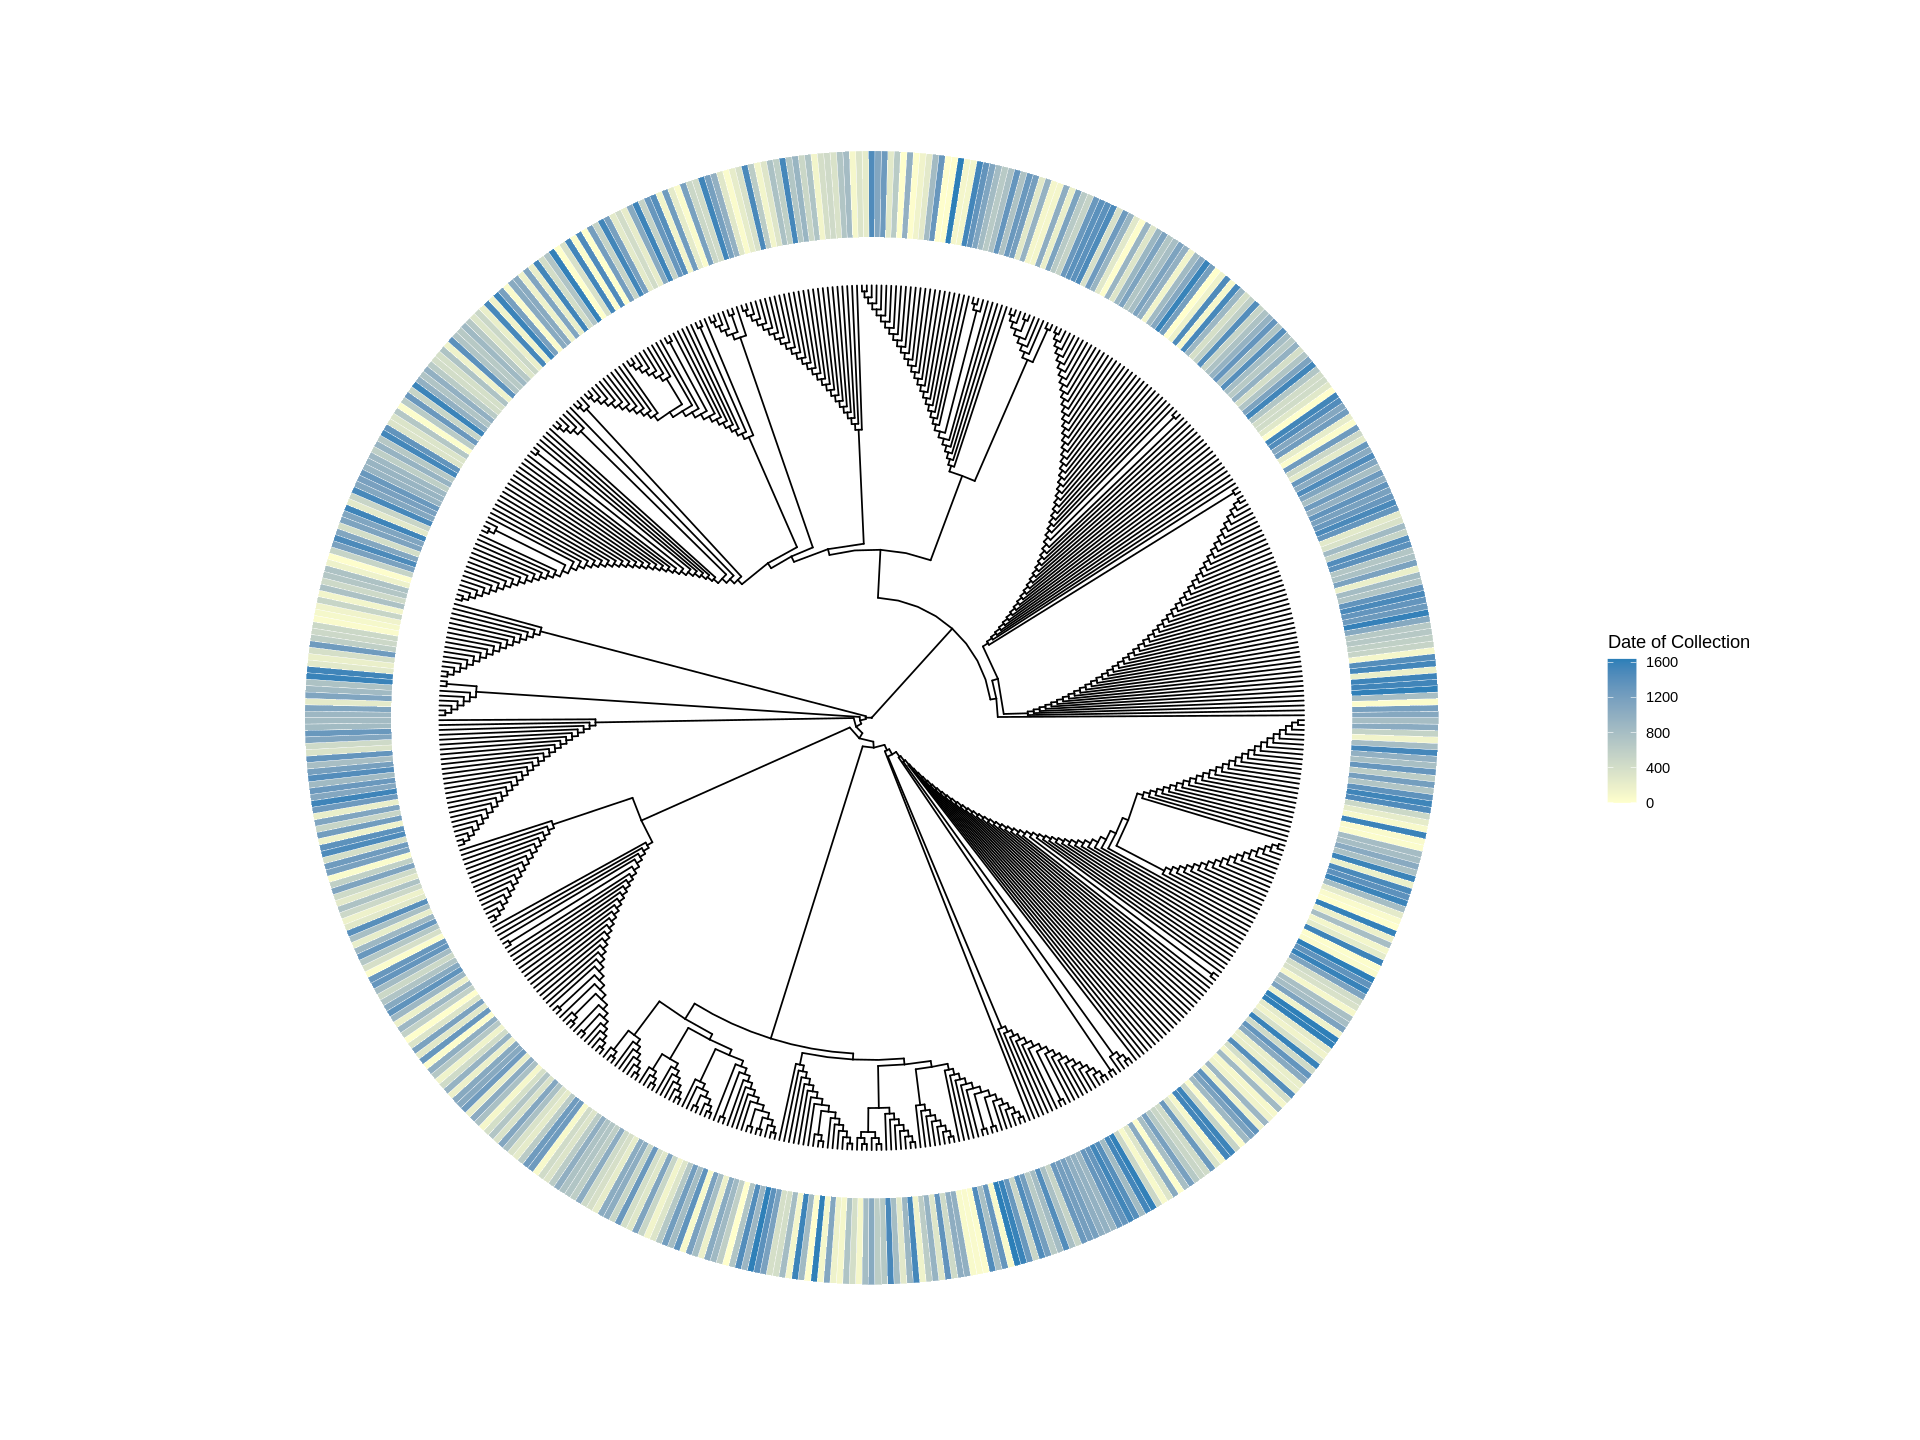

In [1]:
options(repr.plot.width = 16, repr.plot.height = 12)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)

tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/ess_system/tree.nwk"
)

collection_date_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_collection_date.csv"
)

df <- data.frame(tube_code = tree$tip.label)

heatmap_data <- df %>%
  left_join(collection_date_df, by = "tube_code")

circ <- ggtree(tree, layout = "circular", branch.length = "none")

rownames(heatmap_data) <- heatmap_data$tube_code

p <- gheatmap(
  circ,
  heatmap_data %>% select(date_of_collection),
  offset = .8,
  width = .2,
  colnames = FALSE
) +
  scale_fill_gradient(
    name = "Date of Collection",
    low = "#ffffcc",
    high = "#2c7fb8"
  )

p